In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
!git clone https://github.com/biovic/water-quality-classification

fatal: destination path 'water-quality-classification' already exists and is not an empty directory.


In [99]:
!ls water-quality-classification/data

 data.pdf	      readme.md		  'Water Quality Report Swat Final.pdf'
 pakistan_river.csv   water-11-02210.pdf


In [100]:
data_water=pd.read_csv("water-quality-classification/data/pakistan_river.csv")
data_water.head()
# print(len(data_water))

,No,Location,Owned by,Source,Depth,EC,pH,Taste,Color,Odor,Turb,Ca,Hard,Mg,Alk,HCO3,CO3,Cl,K,Na,NO3,SO4,TDS,F,As,Total Coliforms,E.Coli,"""Safe/Unsafe"""
0,1,"Akhun Baba, U/C \nShagai",TMA,Tube well,100,470.0,8.1,Un obj,Clear,O less,0.20,44,250,34.02,3.6,180,BDL,25.0,2.0,8,2.0,45.0,275,0.21,0.31,Nil,Nil,Safe
1,2,Umar Sadiq,-,Tap,NaN,500.0,8.9,Un obj,Clear,O less,0.52,40,260,38.88,4.0,200,30,25.0,1.0,10,3.4,35.0,285,NaN,NaN,Nil,Nil,Safe
2,3,Community Base,-,Hand Pump,NaN,740.0,7.9,Un obj,Clear,O less,0.61,52,350,53.46,5.0,250,BDL,75.0,1.0,20,5.5,35.0,411,NaN,NaN,4,Nil,Unsafe
3,4,Abdul Malik,-,Tap,NaN,490.0,8.2,Un obj,Clear,O less,0.41,40,240,34.02,3.6,180,BDL,25.0,1.0,8,3.1,45.0,275,NaN,NaN,10,Nil,Unsafe
4,5,Naseer Khan,-,Tap,NaN,470.0,8.2,Un obj,Clear,O less,0.35,40,240,34.02,3.6,180,BDL,25.0,1.0,8,3.0,44.0,273,NaN,NaN,10,Nil,Unsafe


0.0
Safe/Unsafe [223, 279]


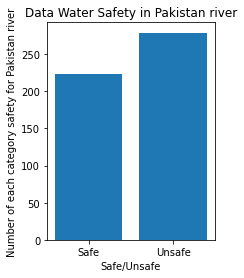

In [101]:
num_of_chars=28
num_of_output=1
num_of_data=len(data_water)

counter_safe=0;
counter_unsafe=0;
total_safe_peril=[]
number_safety=[]

# dict_change={"7":"Un obj","8":"Clear","9":"O less","16":"BDL","25":"Nil","26":"Nil"}
# dict_change_keys= np.array(list(dict_change.keys()))
# dict_change_values= np.array(list(dict_change.values()))
# print(list(dict_change.values()))


for i in range(num_of_data):
  if(data_water.iloc[i,7]=="Un obj"):
    data_water.iloc[i,7]=0
  if(data_water.iloc[i,8]=="Clear"):
    data_water.iloc[i,8]=0
  if(data_water.iloc[i,9]=="O less" or data_water.iloc[i,9]=="Oless"):
    data_water.iloc[i,9]=0  
  if(data_water.iloc[i,10]=="BDL"):
    data_water.iloc[i,10]=0
  if(data_water.iloc[i,16]=="BDL" or data_water.iloc[i,16]==""):
    data_water.iloc[i,16]=0
  if(data_water.iloc[i,24]=="BDL"):
    data_water.iloc[i,24]=0
  if(data_water.iloc[i,25]=="Nil"):
    data_water.iloc[i,25]=0
  if(data_water.iloc[i,26]=="Nil"):
    data_water.iloc[i,26]=0

for j in range(5,num_of_chars-2):
  for i in range(num_of_data):
    A= np.array(data_water.iloc[i,j],dtype=np.float64)
    whereisNAN= np.isnan(A)
    A[whereisNAN]=0
    # print(A)
    data_water.iloc[i,j]=A

  # A= np.array(data_water.iloc[i,24],dtype=np.float64)
  # whereisNAN= np.isnan(A)
  # A[whereisNAN]=0
  # print(A)
  # data_water.iloc[i,24]=A

# print(data_water.head())
print(data_water.iloc[2,23])
# # Repair data into quantity
# for i in range(num_of_data):
#   if(data_water.iloc[i,16]=="BDL"):
#     data_water.iloc[i,16]=0

#output "safe"!= "Safe"
for i in range(num_of_data):
  if(data_water.iloc[i,num_of_chars-1]=='safe'):
    data_water.iloc[i,num_of_chars-1]='Safe'

  # A= np.array(data_water.iloc[i,24])
  # whereisNAN= np.isnan(A)
  # A[whereisNAN]=0
  # print(A)
  # data_water.iloc[i,24]=A

#determine amount of river safe or unsafe
for i in range (num_of_data):
  if(data_water.iloc[i,num_of_chars-1]=='Safe'):
    counter_safe=counter_safe+1
  else:
    counter_unsafe=counter_unsafe+1

total_safe_peril.append(counter_safe)
total_safe_peril.append(counter_unsafe)
print("Safe/Unsafe", total_safe_peril)

#make the amount into a dictionary to describe into graph bar
for i in range(num_of_data):
  if(data_water.iloc[i, num_of_chars-1]=='Safe'):
    number_safety.append(total_safe_peril[0])
  else:
    number_safety.append(total_safe_peril[1])

# #depict all the data into bar
plt.figure(figsize=(3, 4))
plt.bar(data_water.iloc[:,num_of_chars-1], number_safety)
plt.title("Data Water Safety in Pakistan river")
plt.xlabel("Safe/Unsafe")
plt.ylabel("Number of each category safety for Pakistan river")
plt.show()

In [102]:
from sklearn.model_selection import train_test_split, cross_val_score

#decide X=characteristic water safety, Y=output safe or unsafe
X= data_water.iloc[:,5:num_of_chars-2]
y= data_water.iloc[:,num_of_chars-1]
print(X,y)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

print(X_train.shape)
print(y_train.shape)

# print(data_water.iloc[:,16])

        EC   pH Taste Color Odor  ...   SO4    TDS     F    As  Total Coliforms
0    470.0  8.1   0.0   0.0  0.0  ...  45.0  275.0  0.21  0.31              0.0
1    500.0  8.9   0.0   0.0  0.0  ...  35.0  285.0  0.00   0.0              0.0
2    740.0  7.9   0.0   0.0  0.0  ...  35.0  411.0  0.00   0.0              4.0
3    490.0  8.2   0.0   0.0  0.0  ...  45.0  275.0  0.00   0.0             10.0
4    470.0  8.2   0.0   0.0  0.0  ...  44.0  273.0  0.00   0.0             10.0
..     ...  ...   ...   ...  ...  ...   ...    ...   ...   ...              ...
497  480.0  8.1   0.0   0.0  0.0  ...  21.0  267.0  0.00   0.0              7.0
498  485.0  7.6   0.0   0.0  0.0  ...  21.0  267.0  0.00   0.0              0.0
499  480.0  7.6   0.0   0.0  0.0  ...  21.0  267.0  0.00   0.0              0.0
500  480.0  7.5   0.0   0.0  0.0  ...  21.0  267.0  0.00   0.0              0.0
501  475.0  7.5   0.0   0.0  0.0  ...  21.0  267.0  0.00   0.0              0.0

[502 rows x 21 columns] 0        Safe
1

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

all_score=[]
cv_scores=[]

#The model of SVM
model = SVC(kernel='linear', C=0.2, random_state=0)

#Training the model
model.fit(X_train,y_train)
y_result = model.predict(X_test)

#Error evaluation
score = accuracy_score(y_result, y_test)  #find the difference result between prediction and the truth
all_score.append(score)

print(all_score)
#Cross validation score
cross_validation= cross_val_score(model, X,y, cv=10)
print("SVM accuracy:  %0.3f (+/- %0.3f)" %(cross_validation.mean(), cross_validation.std()*2) )
result_cv_score= cross_validation.mean()
cv_scores.append(result_cv_score)

[0.9801980198019802]
SVM accuracy:  0.990 (+/- 0.027)


In [104]:
# import csv

#using random forest
all_scores=[]
eval_scores=[]

from sklearn.ensemble import RandomForestClassifier

#Modelling 
model = RandomForestClassifier(random_state=0, n_estimators=25, n_jobs=2)
model.fit(X_train, y_train)

y_prediction= model.predict(X_test)

#Scoring system
score = accuracy_score(y_prediction,y_test)
all_scores.append(score)

#cross_validation score
cross_validation= cross_val_score(model, X,y, cv=10)
print("RF accuracy:  %0.3f (+/- %0.3f)" %(cross_validation.mean(), cross_validation.std()*2) )
result_cv_score= cross_validation.mean()
eval_scores.append(result_cv_score)

RF accuracy:  0.986 (+/- 0.036)


In [0]:
class kNN():
  def __init__(self):
      pass

  def fit(self, X, y):
      self.data = X
      self.targets = y

  def euclidean_distance(self, X):
      """
      Computes the euclidean distance between the training data and
      a new input example or matrix of input examples X
      """
      # input: single data point
      if X.ndim == 1:
          l2 = np.sqrt(np.sum((self.data - X)**2, axis=1))

      # input: matrix of data points
      if X.ndim == 2:
          n_samples, _ = X.shape
          l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]

      return np.array(l2)

  def predict(self, X, k=1):
      """
      Predicts the classification for an input example or matrix of input examples X
      """
      # step 1: compute distance between input and training data
      dists = self.euclidean_distance(X)

      # step 2: find the k nearest neighbors and their classifications
      if X.ndim == 1:
          if k == 1:
              nn = np.argmin(dists)
              return self.targets[nn]
          else:
              knn = np.argsort(dists)[:k]
              y_knn = self.targets[knn]
              max_vote = max(y_knn, key=list(y_knn).count)
              return max_vote

      if X.ndim == 2:
          knn = np.argsort(dists)[:, :k]
          y_knn = self.targets[knn]
          if k == 1:
              return y_knn.T
          else:
              n_samples, _ = X.shape
              max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
              return max_votes

In [136]:
# model= model_KNN()
# model.fit(X_train,y_train)

# y_prediction= model.predict(X_train)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=100)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_prediction= model.predict(X_test) # 0:Overcast, 2:Mild
# print(y_prediction)

#Scoring system
score = accuracy_score(y_prediction,y_test)
all_scores.append(score)

#cross_validation score
cross_validation= cross_val_score(model, X,y, cv=10)
print("RF accuracy:  %0.3f (+/- %0.3f)" %(cross_validation.mean(), cross_validation.std()*2) )
result_cv_score= cross_validation.mean()
eval_scores.append(result_cv_score)

RF accuracy:  0.486 (+/- 0.202)
